In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
features = ["pclass","sex","embarked","age","fare"]
target = ["survived"]

In [18]:
# missing data 
imp_median = SimpleImputer(strategy = "median")
df[["age"]] = imp_median.fit_transform(df[["age"]])

imp_mode = SimpleImputer(strategy = "most_frequent")
df[["embarked"]] = imp_mode.fit_transform(df[["embarked"]])

# Label encoding 
le = LabelEncoder()
df["age"] = le.fit_transform(df["age"])
df["embarked"] = le.fit_transform(df["embarked"])
df["sex"] = le.fit_transform(df["sex"])

# Train test split
X = df[features]
y = df["survived"]

X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.2 , random_state = 42
)

In [19]:
X_train.head()

,pclass,sex,embarked,age,fare
331,1,1,2,60,28.5000
733,2,1,2,29,13.0000
382,3,1,2,42,7.9250
704,3,1,2,34,7.8542
813,3,0,2,10,31.2750


In [20]:
# Model Training
model = DecisionTreeClassifier()
model.fit(X_train , y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training accuracy: ", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test)*100, "%")
# classic case of overfitting

Training accuracy:  97.75280898876404 %
Testing accuracy:  78.2122905027933 %


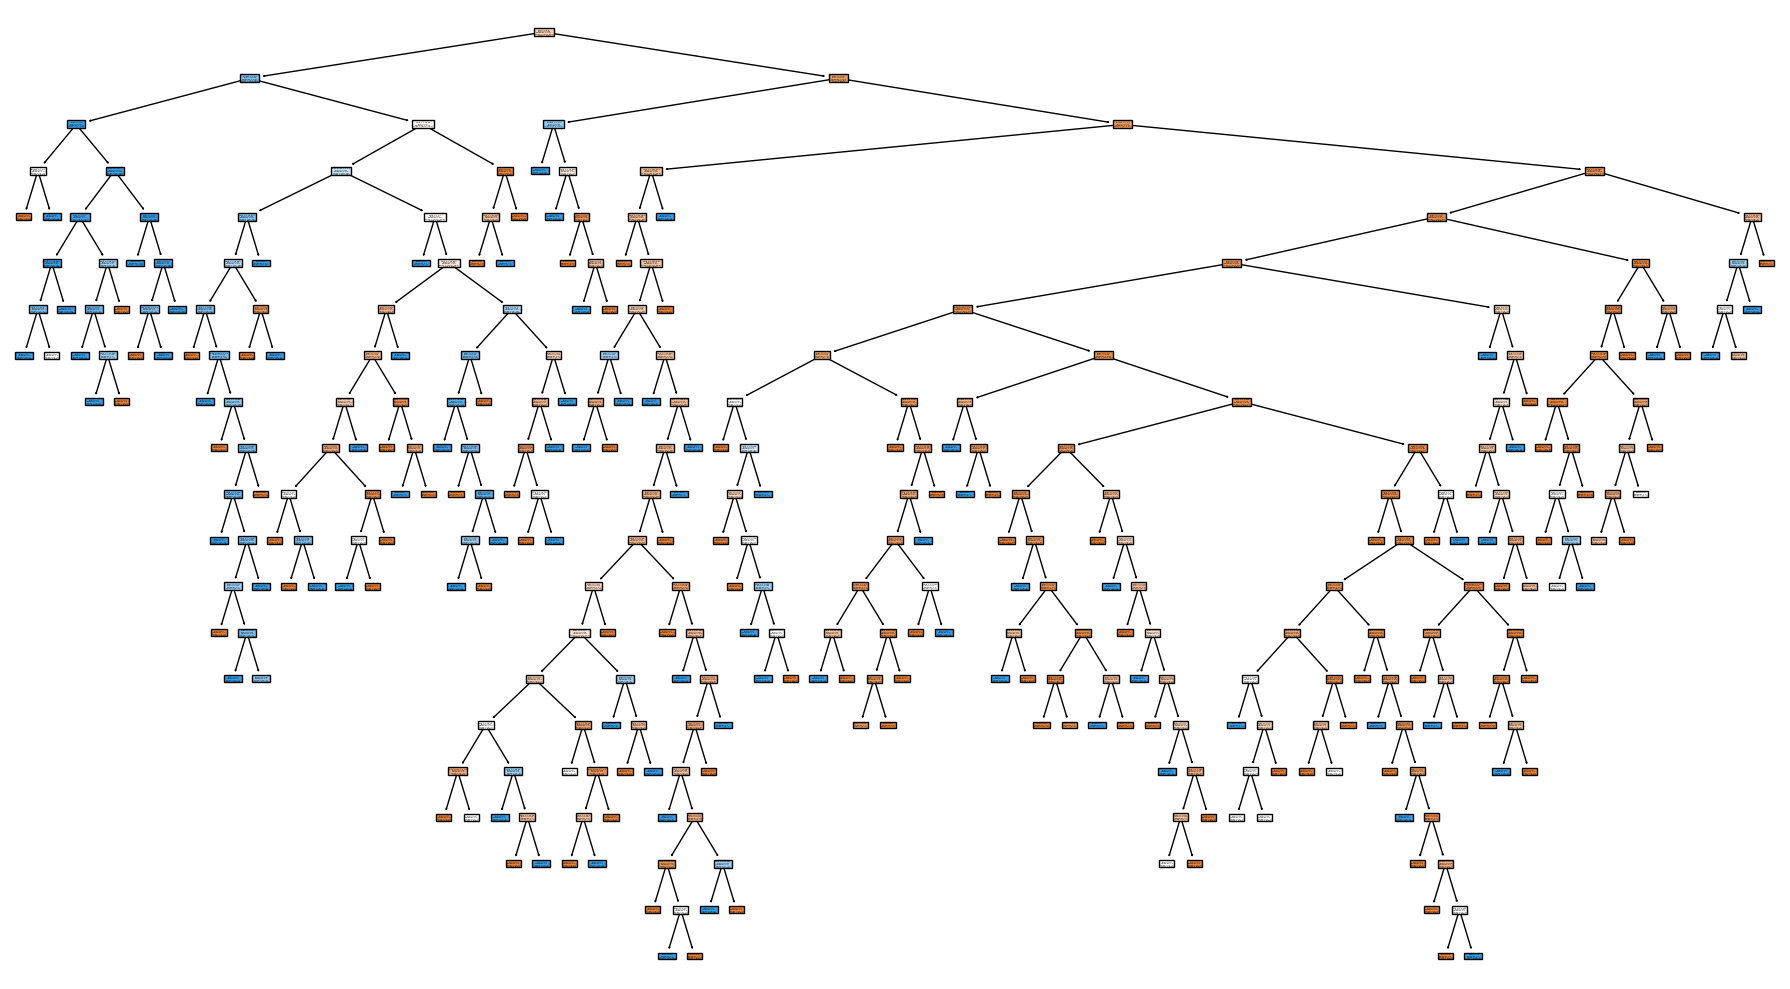

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)

plt.tight_layout()

In [23]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 501,
    oob_score = True,
    max_depth = 4
)

rf.fit(X_train , y_train)

y_pred = rf.predict(X_test)

print("OOB score: ", rf.oob_score_ * 100, "%")
print("testing accuracy: ", accuracy_score(y_test, y_pred) * 100, "%")

OOB score:  82.58426966292134 %
testing accuracy:  81.00558659217877 %
